# Wildfire Detection Model

## Wildfire Data

In [1]:
import numpy as np
import pandas as pd
import ast #for strings
import re #regex

fname='MSCI446_ Data - Sheet1.csv'

def convert_to_numpy_array(string: str):
    # Verify string is written like a python list
    stripped = string.strip()
    pattern = r"\[(.*)\]"
    match = re.match(pattern, stripped)
    if not match:
        raise NotImplementedError(f"{stripped}")
    # Group 1 captures the content inside the square brackets
    contents = match.group(1)
    
    try:
        # Use ast.literal_eval to safely evaluate string literals
        evaluated = ast.literal_eval(stripped)
        if type(evaluated) is not list:
            raise NotImplementedError()
        # series = pd.Series(evaluated)
        return np.array(evaluated)
    except (SyntaxError, ValueError):  # this occurs with the "Condition" column
        # If parsing as a list fails, split the contents within the square brackets by comma, 
        # interpret each value as a string and strip whitespace
        return np.array([ item.strip() for item in contents.split(',') ])

# Read CSV file with the custom function
numerical_vector_column_labels = ['Temperature (F)', 'Dewpoint (F)', 'Humidity (%)', 'Wind Speed (mph)', 'Pressure (in)', 'Percipitation (in)']
categorical_vector_column_labels = ["Condition"]
vector_column_labels = numerical_vector_column_labels + categorical_vector_column_labels

# Create a converters dictionary mapping each column to the converter function
converters = {col: convert_to_numpy_array for col in vector_column_labels}
df = pd.read_csv(fname, converters=converters)
df.shape

(305, 13)

In [2]:
df.head(10)

,Fire Name,Year,Season Started,Locations Affected,Temperature (F),Dewpoint (F),Humidity (%),Wind Speed (mph),Pressure (in),Percipitation (in),Condition,Type Of Location,Y-Value
0,Cagua Fire,2020,Winter,CA,"[75, 75, 73, 73, 72, 72, 71, 72, 72, 78, 82, 81]","[75, 75, 76, 76, 76, 76, 76, 76, 75, 77, 77, 77]","[85, 86, 86, 88, 90, 90, 94, 89, 74, 62, 55, 53]","[2, 3, 3, 3, 4, 4, 2, 4, 2, 4, 6, 6]","[29.8, 29.83, 29.83, 29.86, 29.86, 29.8, 29.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Fair, Fair, Partly Cloudy, Fair, Fair, Partly...",Mountains,Fire
1,Vietnam Fires,2019,Summer,MA,"[79, 81, 81, 82, 84, 86, 88, 90, 91, 93, 95, 97]","[72, 73, 73, 73, 73, 75, 75, 75, 75, 75, 77, 77]","[78, 79, 79, 74, 70, 70, 66, 62, 59, 56, 56, 53]","[5, 6, 2, 5, 7, 5, 5, 7, 5, 6, 5, 2]","[29.64, 29.64, 29.64, 29.64, 29.67, 29.67, 29....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Fair, Fair, Fair, Fair, Windy, Windy, Windy, ...",Coastal Hills,Fire
2,Chile Wildfires,2024,Winter,BC,"[78, 78, 78, 80, 82, 78, 77, 77, 77, 75, 73, 73]","[22, 8, 12, 19, 20, 18, 16, 13, 7, 41, 38, 22]","[74, 79, 84, 79, 74, 79, 83, 83, 83, 94, 94, 89]","[18, 18, 20, 21, 20, 20, 20, 20, 17, 10, 11, 11]","[30.09, 30.09, 30.06, 30.06, 30.06, 30.06, 30....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Fair, Partly Cloudy, Mostly Cloudy, Fair, Par...",Mountains,Fire
3,Chile Wildfires,2024,Winter,AB,"[77, 81, 84, 88, 90, 90, 88, 86, 84, 81, 79, 75]","[55, 54, 55, 54, 55, 55, 52, 54, 54, 54, 54, 54]","[47, 39, 37, 31, 31, 31, 31, 31, 35, 39, 42, 47]","[3, 6, 8, 12, 13, 15, 16, 18, 15, 15, 13, 9]","[28.31, 28.31, 28.28, 28.25, 28.25, 28.22, 28....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Fair, Fair, Fair, Fair, Fair, Fair, Fair, Fai...",Coastal Mountain,Fire
4,Chile Wildfires,2023,Winter,MB,"[72, 73, 73, 73, 75, 77, 75, 73, 70, 68, 64, 63]","[59, 59, 59, 59, 59, 59, 57, 55, 55, 54, 52, 52]","[64, 61, 61, 57, 57, 54, 53, 53, 60, 60, 64, 68]","[13, 17, 18, 17, 21, 23, 21, 23, 18, 20, 17, 15]","[29.87, 29.84, 29.84, 29.84, 29.81, 29.81, 29....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Fair, Fair, Fair, Fair, Windy, Windy, Windy, ...",Coastal Mountain,Fire
5,Russian Wildfires,2019,Summer,ON,"[57, 59, 59, 61, 61, 61, 59, 61, 61, 63, 61, 63]","[43, 41, 41, 41, 41, 41, 39, 39, 37, 37, 37, 37]","[51, 51, 48, 48, 48, 48, 45, 42, 39, 42, 39, 39]","[11, 13, 11, 16, 18, 16, 16, 18, 16, 16, 11, 13]","[29.11, 29.11, 29.11, 29.11, 29.11, 29.11, 29....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Fair, Fair, Fair, Fair, Fair, Fair, Fair, Fai...",Hills,Fire
6,Chilean Patagonia Wildfire,2021,Summer,YT,"[45, 45, 45, 45, 45, 43, 46, 46, 45, 45, 45, 45]","[39, 41, 41, 41, 41, 39, 37, 37, 37, 37, 37, 37]","[81, 87, 87, 87, 87, 87, 71, 71, 76, 76, 76, 76]","[23, 25, 22, 18, 21, 17, 25, 25, 29, 23, 23, 23]","[27.81, 27.86, 27.89, 27.89, 27.95, 27.92, 27....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Windy, Windy, Rain, Light Rain, Windy, Light ...",Coastal Forest,Fire
7,Chile Wildfires,2017,Winter,MA,"[84, 86, 84, 88, 86, 90, 90, 86, 84, 79, 75, 72]","[59, 61, 59, 61, 61, 63, 59, 59, 61, 57, 57, 57]","[42, 43, 42, 40, 36, 40, 45, 47, 53, 47, 53, 60]","[12, 14, 18, 15, 17, 20, 23, 24, 20, 16, 13, 9]","[29.93, 29.9, 29.9, 29.87, 29.87, 29.87, 29.84...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Fair, Fair, Fair, Fair, Fair, Fair, Fair, Fai...",Coastal Mountain,Fire
8,Valparaiso Wildfire,2014,Spring,CA,"[50, 50, 52, 46, 48, 52, 55, 57, 61, 64, 66, 70]","[41, 41, 41, 43, 41, 43, 43, 43, 45, 45, 46, 46]","[71, 71, 71, 81, 82, 71, 63, 59, 55, 49, 49, 43]","[2, 1, 5, 2, 3, 5, 2, 1, 2, 2, 1, 5]","[28.36, 28.36, 28.36, 28.36, 28.36, 28.39, 28....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Fair, Fair, Fair, Fair, Fair, Fair, Fair, Mos...",Coastal Forest,Fire
9,Araucania Wildfire,2012,Winter,BC,"[66, 66, 68, 68, 68, 68, 66, 0, 64, 63, 63, 63]","[57, 57, 57, 59, 57, 57, 59, 0, 59, 59, 59, 59]","[73, 73, 68, 73, 68, 68, 78, 0, 83, 88, 88, 88]","[10, 14, 15, 16, 17, 13, 14, 13, 12, 9, 3, 5]","[29.93, 29.93, 29.93, 29.93, 29.93,

## Checking Data

### Check Categorical Data

In [3]:
categorical_column_labels = ["Season Started", "Locations Affected", "Condition", "Type Of Location", "Y-Value"]
categorical_scalar_column_labels = ["Season Started", "Locations Affected", "Type Of Location", "Y-Value"]

In [4]:
for cl in categorical_scalar_column_labels:
    print(df[cl].value_counts())
    print()

Summer    135
Spring     75
Fall       49
Winter     46
Name: Season Started, dtype: int64

CA      40
BC      35
AB      33
MB      25
NT      17
ON      17
YT      12
AZ       9
NM       8
FL       8
CO       8
QC       8
WA       7
TX       6
ID       6
SK       6
NY       5
OR       5
MA       5
TN       3
UT       3
SC       3
WY       3
MT       3
MN       3
DC       3
IL       3
AL       3
WC       2
PN       2
DK       2
NC       2
NJ       2
Utah     1
OK       1
MS       1
VN       1
Lyon     1
AK       1
MI       1
NF       1
Name: Locations Affected, dtype: int64

Forest              77
Mountains           60
Coastal Mountain    17
Hills               16
Coastal Forest      13
Arctic              11
Rainforest           8
Flat                 8
Grasslands           6
Plains               6
Desert               4
Coastal Hills        3
Swamp                3
Coastal Lowland      2
Coastal              1
Name: Type Of Location, dtype: int64

Fire       155
No Fire    150
Name

### Checking Vectors

In [5]:
# Check whether collected for all numerical stats are of vectors of size 12 (For the recorded stats of a 12 hour period before a fire)
vector_columns = df[vector_column_labels]

In [6]:
# Verifying all are ndarray
is_ndarray = vector_columns.applymap(lambda x: isinstance(x, np.ndarray))
is_ndarray.all().all()

True

In [7]:
desired_shape = (12,)

shape = vector_columns.applymap(lambda x: x.shape)
is_desired_shape = shape.applymap(lambda x: x == desired_shape)

is_desired_shape = vector_columns.applymap(lambda x: x.shape == desired_shape)

# Boolean series containing whether all vectors in that row are of the desired shape
valid_shape_rows = is_desired_shape.all(axis=1)

# Whether all vectors are of desired shape
is_desired_shape.all().all()

True

## Convert Vector to Min, Max, Avg Calculation

We originally had vectors of size 12 to store data recorded in the past 12 hours before a fire (or of a non-fire day)

However because the models required our data to be strictly 2-dimensional, we decided to generate minimum, average, and maximum values for specified columns instead

In [8]:
# Columns to generate stats for
columns_to_process = numerical_vector_column_labels

# Function to compute min, avg, and max and return as a Series
def compute_stats(arr):
    return pd.Series([np.min(arr), np.mean(arr), np.max(arr)], index=['min', 'avg', 'max'])

# New DataFrame to store results
num_stats_df = pd.DataFrame()

# Iterate over specified columns
for col in df.columns:
    # If the column contains numpy arrays and is in the columns to process
    if col in columns_to_process:  # and np.issubdtype(df[col].dtype, np.ndarray)
        # Compute statistics for each numpy array element in the column
        stats = df[col].apply(compute_stats)
        # Rename columns to include the statistics
        stats.columns = [f"{col}_min", f"{col}_avg", f"{col}_max"]
        # Concatenate the statistics columns with the original column and insert them into the new DataFrame
        #num_stats_df = pd.concat([num_stats_df, df[col], stats], axis=1)
        num_stats_df = pd.concat([num_stats_df, stats], axis=1)
    else:
        # If not a numpy array column or not in columns to process, copy it to the new DataFrame
        num_stats_df[col] = df[col]

num_stats_df.head(10)


,Fire Name,Year,Season Started,Locations Affected,Temperature (F)_min,Temperature (F)_avg,Temperature (F)_max,Dewpoint (F)_min,Dewpoint (F)_avg,Dewpoint (F)_max,...,Wind Speed (mph)_max,Pressure (in)_min,Pressure (in)_avg,Pressure (in)_max,Percipitation (in)_min,Percipitation (in)_avg,Percipitation (in)_max,Condition,Type Of Location,Y-Value
0,Cagua Fire,2020,Winter,CA,71.0,74.666667,82.0,75.0,76.000000,77.0,...,6.0,29.80,29.835000,29.86,0.0,0.0,0.0,"[Fair, Fair, Partly Cloudy, Fair, Fair, Partly...",Mountains,Fire
1,Vietnam Fires,2019,Summer,MA,79.0,87.250000,97.0,72.0,74.416667,77.0,...,7.0,29.64,29.652500,29.67,0.0,0.0,0.0,"[Fair, Fair, Fair, Fair, Windy, Windy, Windy, ...",Coastal Hills,Fire
2,Chile Wildfires,2024,Winter,BC,73.0,77.166667,82.0,7.0,19.666667,41.0,...,21.0,30.03,30.067500,30.09,0.0,0.0,0.0,"[Fair, Partly Cloudy, Mostly Cloudy, Fair, Par...",Mountains,Fire
3,Chile Wildfires,2024,Winter,AB,75.0,83.583333,90.0,52.0,54.166667,55.0,...,18.0,28.22,28.252500,28.31,0.0,0.0,0.0,"[Fair, Fair, Fair, Fair, Fair, Fair, Fair, Fai...",Coastal Mountain,Fire
4,Chile Wildfires,2023,Winter,MB,63.0,71.333333,77.0,52.0,56.583333,59.0,...,23.0,29.78,29.822500,29.87,0.0,0.0,0.0,"[Fair, Fair, Fair, Fair, Windy, Windy, Windy, ...",Coastal Mountain,Fire
5,Russian Wildfires,2019,Summer,ON,57.0,60.500000,63.0,37.0,39.500000,43.0,...,18.0,29.11,29.110000,29.11,0.0,0.0,0.0,"[Fair, Fair, Fair, Fair, Fair, Fair, Fair, Fai...",Hills,Fire
6,Chilean Patagonia Wildfire,2021,Summer,YT,43.0,45.000000,46.0,37.0,38.666667,41.0,...,29.0,27.81,27.883333,27.95,0.0,0.0,0.0,"[Windy, Windy, Rain, Light Rain, Windy, Light ...",Coastal Forest,Fire
7,Chile Wildfires,2017,Winter,MA,72.0,83.666667,90.0,57.0,59.500000,63.0,...,24.0,29.84,29.872500,29.93,0.0,0.0,0.0,"[Fair, Fair, Fair, Fair, Fair, Fair, Fair, Fai...",Coastal Mountain,Fire
8,Valparaiso Wildfire,2014,Spring,CA,46.0,55.916667,70.0,41.0,43.166667,46.0,...,5.0,28.33,28.367500,28.39,0.0,0.0,0.0,"[Fair, Fair, Fair, Fair, Fair, Fair, Fair, Mos...",Coastal Forest,Fire
9,Araucania Wildfire,2012,Winter,BC,0.0,60.250000,68.0,0.0,53.250000,59.0,...,17.0,0.00,27.420833,29.93,0.0,0.0,0.0,"[Cloudy, Cloudy, Mostly Cloudy, Mostly Cloudy,...",Coastal Forest,Fire


## Data Preparation

### Dealing with Outliers

We keep the outlier data in our wildfire prediction dataset, which includes weather and location information, for several important reasons. Firstly, outliers might represent extreme weather conditions that could lead to wildfires, so it's crucial for our model to learn from these instances. Secondly, removing outliers could lead to losing important information, making our model less effective in real-world situations. Additionally, outliers help us understand the full range of environmental conditions that contribute to wildfires. By training our model with outlier data, we ensure it can recognize high-risk conditions accurately. Plus, investigating outliers helps us maintain data accuracy and address any issues with measurements. Finally, keeping outlier data ensures fairness and prevents bias in our predictions, treating all data equally.


### Dealing with Duplicates

In [9]:
cols_to_look_at = num_stats_df.drop(['Condition'], axis=1).columns.tolist()
num_stats_df[cols_to_look_at].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
300    False
301    False
302    False
303    False
304    False
Length: 305, dtype: bool

There are no duplicated values

### Dealing with missing values

The missing data seems to be for non-fire data because the column for Fire Name is empty. Instead of dropping missing data,  which we believe is only on the names of the fire/type of location, we fill in default No Fire and default location.

In [10]:
na_rows_2 = num_stats_df[num_stats_df.isna().any(axis=1)]

# Iterate over rows with NaN values
for index, row in na_rows_2.iterrows():
    # Check if 'Fire Name' column is NaN, and if so, replace with 'Non Fire'
    if pd.isna(row['Fire Name']):
        num_stats_df.at[index, 'Fire Name'] = 'Non Fire'
    # Check if 'Type of Location' column is NaN, and if so, replace with 'Forest'
    if pd.isna(row['Type Of Location']):
        num_stats_df.at[index, 'Type Of Location'] = 'Forest'

print(num_stats_df)

           Fire Name  Year Season Started Locations Affected  \
0         Cagua Fire  2020         Winter                 CA   
1      Vietnam Fires  2019         Summer                 MA   
2    Chile Wildfires  2024         Winter                 BC   
3    Chile Wildfires  2024         Winter                 AB   
4    Chile Wildfires  2023         Winter                 MB   
..               ...   ...            ...                ...   
300         Non Fire  2020         Summer                 MB   
301         Non Fire  2020         Summer                 MB   
302         Non Fire  2020           Fall                 MB   
303         Non Fire  2020         Summer                 NT   
304         Non Fire  2020         Summer                 NT   

     Temperature (F)_min  Temperature (F)_avg  Temperature (F)_max  \
0                   71.0            74.666667                 82.0   
1                   79.0            87.250000                 97.0   
2                   7

Checking contents for numpy arrays (numerical only)

In [11]:
na_rows = num_stats_df[num_stats_df.isna().any(axis=1)]
na_rows

,Fire Name,Year,Season Started,Locations Affected,Temperature (F)_min,Temperature (F)_avg,Temperature (F)_max,Dewpoint (F)_min,Dewpoint (F)_avg,Dewpoint (F)_max,...,Wind Speed (mph)_max,Pressure (in)_min,Pressure (in)_avg,Pressure (in)_max,Percipitation (in)_min,Percipitation (in)_avg,Percipitation (in)_max,Condition,Type Of Location,Y-Value


## Dealing with categorical data

For output we will use Label Encoding since it is binary data (0 or 1). For remaining categorical data we will use one-hot encoding.

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
print(df['Y-Value'].value_counts())
print(df['Locations Affected'].value_counts())
print(num_stats_df['Y-Value'].value_counts())
print(num_stats_df['Locations Affected'].value_counts())

Fire       155
No Fire    150
Name: Y-Value, dtype: int64
CA      40
BC      35
AB      33
MB      25
NT      17
ON      17
YT      12
AZ       9
NM       8
FL       8
CO       8
QC       8
WA       7
TX       6
ID       6
SK       6
NY       5
OR       5
MA       5
TN       3
UT       3
SC       3
WY       3
MT       3
MN       3
DC       3
IL       3
AL       3
WC       2
PN       2
DK       2
NC       2
NJ       2
Utah     1
OK       1
MS       1
VN       1
Lyon     1
AK       1
MI       1
NF       1
Name: Locations Affected, dtype: int64
Fire       155
No Fire    150
Name: Y-Value, dtype: int64
CA      40
BC      35
AB      33
MB      25
NT      17
ON      17
YT      12
AZ       9
NM       8
FL       8
CO       8
QC       8
WA       7
TX       6
ID       6
SK       6
NY       5
OR       5
MA       5
TN       3
UT       3
SC       3
WY       3
MT       3
MN       3
DC       3
IL       3
AL       3
WC       2
PN       2
DK       2
NC       2
NJ       2
Utah     1
OK       1
MS       

#### One-hot encoding

In [14]:
# Replace y value
# with pd.option_context('future.no_silent_downcasting', True):
fire_map = {'Fire': 1, 'Fire\r\n': 1, 'No Fire': 0, 'Not Fire': 0}
#     coded_df = pd.DataFrame()
#     coded_df['Y-Value_encoded'] = unencoded_df['Y-Value'].replace(fire_map).astype(int)
#     coded_df['Y-Value_encoded'].value_counts()
df['Y-Value'] = df['Y-Value'].replace(fire_map)
num_stats_df['Y-Value'] = num_stats_df['Y-Value'].replace(fire_map)
print(df['Y-Value'].value_counts())
print(df['Locations Affected'].value_counts())
print(num_stats_df['Y-Value'].value_counts())
print(num_stats_df['Locations Affected'].value_counts())

1    155
0    150
Name: Y-Value, dtype: int64
CA      40
BC      35
AB      33
MB      25
NT      17
ON      17
YT      12
AZ       9
NM       8
FL       8
CO       8
QC       8
WA       7
TX       6
ID       6
SK       6
NY       5
OR       5
MA       5
TN       3
UT       3
SC       3
WY       3
MT       3
MN       3
DC       3
IL       3
AL       3
WC       2
PN       2
DK       2
NC       2
NJ       2
Utah     1
OK       1
MS       1
VN       1
Lyon     1
AK       1
MI       1
NF       1
Name: Locations Affected, dtype: int64
1    155
0    150
Name: Y-Value, dtype: int64
CA      40
BC      35
AB      33
MB      25
NT      17
ON      17
YT      12
AZ       9
NM       8
FL       8
CO       8
QC       8
WA       7
TX       6
ID       6
SK       6
NY       5
OR       5
MA       5
TN       3
UT       3
SC       3
WY       3
MT       3
MN       3
DC       3
IL       3
AL       3
WC       2
PN       2
DK       2
NC       2
NJ       2
Utah     1
OK       1
MS       1
VN       1
Lyon     1


In [15]:
# # Replace seasons
indicator = pd.get_dummies(df['Season Started'], prefix='Season_Started')
indicator_stats = pd.get_dummies(num_stats_df['Season Started'], prefix='Season_Started')
# indicator, indicator_stats
df = df.drop(['Season Started'], axis=1)
df = df.join(indicator)
num_stats_df = num_stats_df.join(indicator_stats)
num_stats_df = num_stats_df.drop(['Season Started'], axis=1)
df.head(10), num_stats_df.head(10)

(                    Fire Name  Year Locations Affected  \
 0                  Cagua Fire  2020                 CA   
 1               Vietnam Fires  2019                 MA   
 2             Chile Wildfires  2024                 BC   
 3             Chile Wildfires  2024                 AB   
 4             Chile Wildfires  2023                 MB   
 5           Russian Wildfires  2019                 ON   
 6  Chilean Patagonia Wildfire  2021                 YT   
 7             Chile Wildfires  2017                 MA   
 8         Valparaiso Wildfire  2014                 CA   
 9          Araucania Wildfire  2012                 BC   
 
                                     Temperature (F)  \
 0  [75, 75, 73, 73, 72, 72, 71, 72, 72, 78, 82, 81]   
 1  [79, 81, 81, 82, 84, 86, 88, 90, 91, 93, 95, 97]   
 2  [78, 78, 78, 80, 82, 78, 77, 77, 77, 75, 73, 73]   
 3  [77, 81, 84, 88, 90, 90, 88, 86, 84, 81, 79, 75]   
 4  [72, 73, 73, 73, 75, 77, 75, 73, 70, 68, 64, 63]   
 5  [57, 59, 

In [16]:
# Locations Affected
indicator_new = pd.get_dummies(df['Locations Affected'], prefix='Locations_Affected')
indicator_stats_new = pd.get_dummies(num_stats_df['Locations Affected'], prefix='Locations_Affected')
# indicator, indicator_stats
df = df.drop(['Locations Affected'], axis=1)
df = df.join(indicator_new)
num_stats_df = num_stats_df.join(indicator_stats_new)
num_stats_df = num_stats_df.drop(['Locations Affected'], axis=1)
#df.head(10), num_stats_df.head(10)
df.columns.tolist()

['Fire Name',
 'Year',
 'Temperature (F)',
 'Dewpoint (F)',
 'Humidity (%)',
 'Wind Speed (mph)',
 'Pressure (in)',
 'Percipitation (in)',
 'Condition',
 'Type Of Location',
 'Y-Value',
 'Season_Started_Fall',
 'Season_Started_Spring',
 'Season_Started_Summer',
 'Season_Started_Winter',
 'Locations_Affected_AB',
 'Locations_Affected_AK',
 'Locations_Affected_AL',
 'Locations_Affected_AZ',
 'Locations_Affected_BC',
 'Locations_Affected_CA',
 'Locations_Affected_CO',
 'Locations_Affected_DC',
 'Locations_Affected_DK',
 'Locations_Affected_FL',
 'Locations_Affected_ID',
 'Locations_Affected_IL',
 'Locations_Affected_Lyon',
 'Locations_Affected_MA',
 'Locations_Affected_MB',
 'Locations_Affected_MI',
 'Locations_Affected_MN',
 'Locations_Affected_MS',
 'Locations_Affected_MT',
 'Locations_Affected_NC',
 'Locations_Affected_NF',
 'Locations_Affected_NJ',
 'Locations_Affected_NM',
 'Locations_Affected_NT',
 'Locations_Affected_NY',
 'Locations_Affected_OK',
 'Locations_Affected_ON',
 'Locati

In [17]:
# Type Of Location
indicator_new_loc = pd.get_dummies(df['Type Of Location'], prefix='Type_Of_Location')
indicator_stats_new_loc = pd.get_dummies(num_stats_df['Type Of Location'], prefix='Type_Of_Location')
# indicator, indicator_stats
df = df.drop(['Type Of Location'], axis=1)
df = df.join(indicator_new_loc)
num_stats_df = num_stats_df.join(indicator_stats_new_loc)
num_stats_df = num_stats_df.drop(['Type Of Location'], axis=1)
#df.head(10), num_stats_df.head(10)
df.columns.tolist()


['Fire Name',
 'Year',
 'Temperature (F)',
 'Dewpoint (F)',
 'Humidity (%)',
 'Wind Speed (mph)',
 'Pressure (in)',
 'Percipitation (in)',
 'Condition',
 'Y-Value',
 'Season_Started_Fall',
 'Season_Started_Spring',
 'Season_Started_Summer',
 'Season_Started_Winter',
 'Locations_Affected_AB',
 'Locations_Affected_AK',
 'Locations_Affected_AL',
 'Locations_Affected_AZ',
 'Locations_Affected_BC',
 'Locations_Affected_CA',
 'Locations_Affected_CO',
 'Locations_Affected_DC',
 'Locations_Affected_DK',
 'Locations_Affected_FL',
 'Locations_Affected_ID',
 'Locations_Affected_IL',
 'Locations_Affected_Lyon',
 'Locations_Affected_MA',
 'Locations_Affected_MB',
 'Locations_Affected_MI',
 'Locations_Affected_MN',
 'Locations_Affected_MS',
 'Locations_Affected_MT',
 'Locations_Affected_NC',
 'Locations_Affected_NF',
 'Locations_Affected_NJ',
 'Locations_Affected_NM',
 'Locations_Affected_NT',
 'Locations_Affected_NY',
 'Locations_Affected_OK',
 'Locations_Affected_ON',
 'Locations_Affected_OR',
 'L

In [18]:
# Conditions
df_cur = pd.get_dummies(df['Condition'].apply(pd.Series).stack(), prefix='Condition_').groupby(level=0).sum()
num_stats_df_cr = pd.get_dummies(num_stats_df['Condition'].apply(pd.Series).stack(), prefix='Condition_').groupby(level=0).sum()
df = pd.concat([df, df_cur], axis=1)
num_stats_df = pd.concat([num_stats_df, num_stats_df_cr], axis=1)
df.columns.tolist(), num_stats_df.columns.tolist()


(['Fire Name',
  'Year',
  'Temperature (F)',
  'Dewpoint (F)',
  'Humidity (%)',
  'Wind Speed (mph)',
  'Pressure (in)',
  'Percipitation (in)',
  'Condition',
  'Y-Value',
  'Season_Started_Fall',
  'Season_Started_Spring',
  'Season_Started_Summer',
  'Season_Started_Winter',
  'Locations_Affected_AB',
  'Locations_Affected_AK',
  'Locations_Affected_AL',
  'Locations_Affected_AZ',
  'Locations_Affected_BC',
  'Locations_Affected_CA',
  'Locations_Affected_CO',
  'Locations_Affected_DC',
  'Locations_Affected_DK',
  'Locations_Affected_FL',
  'Locations_Affected_ID',
  'Locations_Affected_IL',
  'Locations_Affected_Lyon',
  'Locations_Affected_MA',
  'Locations_Affected_MB',
  'Locations_Affected_MI',
  'Locations_Affected_MN',
  'Locations_Affected_MS',
  'Locations_Affected_MT',
  'Locations_Affected_NC',
  'Locations_Affected_NF',
  'Locations_Affected_NJ',
  'Locations_Affected_NM',
  'Locations_Affected_NT',
  'Locations_Affected_NY',
  'Locations_Affected_OK',
  'Locations_Af

### Feature Scaling

We were going to feature scale for all of our data, but it lead to our SVM model to be too computationally expensive and lead to it running indefinitely, thus we used feature scaling on KNN and Logistic Regression, but not SVM. 

In [19]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# Features = num_stats_df.drop(columns=['Y-Value', 'Fire Name', 'Condition']).columns.tolist()
# num_stats_df[Features] = scaler.fit_transform(num_stats_df[Features])

## Model Training

### KNN Without StandardScaling

Scaling features can affect the performance of k-nearest neighbors (KNN) algorithms similarly to support vector machines (SVMs), although the impact may not be as pronounced. KNN relies on distance metrics to measure the similarity between data points, and when features are on different scales, those with larger magnitudes may dominate the distance calculation, leading to biased results. Feature scaling ensures that all features contribute equally to distance computations, helping to mitigate this bias.

So we will doing a KNN model with standard scaling and one without to see the performance difference.


In [32]:
# Initialize lists to store mean accuracy for each K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

mean_accuracies = []
num_stats_df.columns.tolist()
column_types = num_stats_df.dtypes
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Perform bootstrapping and cross-validation for each K
for k in k_values:
    accuracies = []
    for _ in range(100):  # Perform bootstrapping with replacement 100 times
        # Generate random indices for bootstrapping
        target_var = 'Y-Value'
        num_stats_df.columns.tolist()
        
        # Determining Train Test Indices with Bootstrap
        df_bootstrapped = num_stats_df.sample(n=len(num_stats_df), replace=True)
        X = df_bootstrapped.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
        y = df_bootstrapped[target_var]
        
        # Create KNN classifier with current K
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Perform cross-validation
        scores = cross_val_score(knn, X, y, cv=5)
        
        # Calculate mean accuracy and store
        accuracies.append(scores.mean())
    
    # Calculate mean accuracy across bootstraps for current K
    mean_accuracies.append(np.mean(accuracies))

# Find the best K based on mean accuracy
for acc in mean_accuracies:
    print("ACC: ", acc)
best_k = k_values[np.argmax(mean_accuracies)]
print("Best K: ", best_k)

ACC:  0.8730163934426229
ACC:  0.8192459016393441
ACC:  0.8062622950819673
ACC:  0.7880655737704919
ACC:  0.7918688524590164
ACC:  0.7867540983606558
ACC:  0.7824918032786886
ACC:  0.7752786885245903
ACC:  0.7807213114754099
Best K:  1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn import metrics

target_var = 'Y-Value'

# Determining Train Test Indices
X = num_stats_df.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
y = num_stats_df[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

# Create KNN classifier with current K
knn = KNeighborsClassifier(n_neighbors=best_k)

knn1_pred = knn.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")
print('MSE of KNN: ', metrics.mean_squared_error(y_test, knn1_pred))

# Calculate mean accuracy and store
acc = metrics.accuracy_score(y_test,knn1_pred)
print('The accuracy of KNN W/O Scaling model is ', acc)

print('Precision:', metrics.precision_score(y_test, knn1_pred))
print('Recall:', metrics.recall_score(y_test, knn1_pred))
print('Accuracy:', metrics.accuracy_score(y_test, knn1_pred))
print('F1:', metrics.f1_score(y_test, knn1_pred))
print(metrics.classification_report(y_test, knn1_pred))
confusion_table(y_test, knn1_pred)

MSE of KNN:  0.2459016393442623
The accuracy of KNN W/O Scaling model is  0.7540983606557377
Precision: 0.8076923076923077
Recall: 0.6774193548387096
Accuracy: 0.7540983606557377
F1: 0.7368421052631579
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.81      0.68      0.74        31

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



Truth,0,1
Predicted,,
0,25,5
1,10,21


### KNN With Scaling

We will use bootstrapping and cross validation several times to find the overall best K-neighbours for our model

In [22]:
# Initialize lists to store mean accuracy for each K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

mean_accuracies = []
num_stats_df.columns.tolist()
column_types = num_stats_df.dtypes
scaler = StandardScaler()
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Perform bootstrapping and cross-validation for each K
for k in k_values:
    accuracies = []
    for _ in range(100):  # Perform bootstrapping with replacement 100 times
        # Generate random indices for bootstrapping
        target_var = 'Y-Value'
        num_stats_df.columns.tolist()
        
        # Determining Train Test Indices with Bootstrap
        df_bootstrapped = num_stats_df.sample(n=len(num_stats_df), replace=True)
        X = df_bootstrapped.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
        y = df_bootstrapped[target_var]
        X_scaled = scaler.fit_transform(X)
        
        # Create KNN classifier with current K
        knn_scaled = KNeighborsClassifier(n_neighbors=k)
        
        # Perform cross-validation
        scores = cross_val_score(knn_scaled, X_scaled, y, cv=5)
        
        # Calculate mean accuracy and store
        accuracies.append(scores.mean())
    
    # Calculate mean accuracy across bootstraps for current K
    mean_accuracies.append(np.mean(accuracies))

# Find the best K based on mean accuracy
for acc in mean_accuracies:
    print("ACC: ", acc)
best_k_scaled = k_values[np.argmax(mean_accuracies)]
print("Best K: ", best_k_scaled)


ACC:  0.8545573770491803
ACC:  0.7868852459016391
ACC:  0.7706557377049178
ACC:  0.7448196721311474
ACC:  0.75072131147541
ACC:  0.7359016393442623
ACC:  0.7292459016393441
ACC:  0.7353114754098362
ACC:  0.7234754098360656
Best K:  1


Having found our best K-neighbours from above, we will now fit it against our actual data and generate stats

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn import metrics

target_var = 'Y-Value'
scaler = StandardScaler()

# Determining Train Test Indices
X = num_stats_df.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
y = num_stats_df[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN classifier with current K
knn_scaled = KNeighborsClassifier(n_neighbors=best_k_scaled)

knn1_pred_scaled = knn_scaled.fit(X_train_scaled, y_train).predict(X_test_scaled)
np.mean(y_test != knn1_pred_scaled), np.mean(y_test != "No")
print('MSE of KNN: ', metrics.mean_squared_error(y_test, knn1_pred_scaled))

# Calculate mean accuracy and store
acc = metrics.accuracy_score(y_test,knn1_pred_scaled)
print('The accuracy of KNN model is ', acc)

print('Precision:', metrics.precision_score(y_test, knn1_pred_scaled))
print('Recall:', metrics.recall_score(y_test, knn1_pred_scaled))
print('Accuracy:', metrics.accuracy_score(y_test, knn1_pred_scaled))
print('F1:', metrics.f1_score(y_test, knn1_pred_scaled))
print(metrics.classification_report(y_test, knn1_pred_scaled))
confusion_table(y_test, knn1_pred_scaled)

MSE of KNN:  0.29508196721311475
The accuracy of KNN model is  0.7049180327868853
Precision: 0.696969696969697
Recall: 0.7419354838709677
Accuracy: 0.7049180327868853
F1: 0.71875
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.70      0.74      0.72        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



Truth,0,1
Predicted,,
0,20,10
1,8,23


### Logistic Regression

We will use bootstrapping and MSE several times to find the overall best threshold for our model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

# Initialize lists to store mean squared error and corresponding thresholds
mean_mse = []
best_threshold = None
min_mse = float('inf')
scaler = StandardScaler()
target_var = 'Y-Value'

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Perform bootstrapping and cross-validation
for threshold in thresholds:
    mse_values = []
    for _ in range(1000): 
        df_bootstrapped = num_stats_df.sample(n=len(num_stats_df), replace=True)
        X = df_bootstrapped.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
        y = df_bootstrapped[target_var]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Fit the logistic regression model
        model_logistic = LogisticRegression(max_iter=1000)
        model_logistic.fit(X_train_scaled, y_train)
        
        # Predict probability
        probabilities = model_logistic.predict_proba(X_test_scaled)[:, 1]
        
        # Assign Prediction based on threshold
        prediction = (probabilities >= threshold).astype(int)
        
        # Calculate MSE
        mse = metrics.mean_squared_error(y_test, prediction)
        mse_values.append(mse)
    
    # Calculate mean MSE for the current threshold
    mean_mse_val = np.mean(mse_values)
    mean_mse.append((mean_mse_val, threshold))  # Store MSE along with the threshold
    
    # Check if current MSE is the lowest
    if mean_mse_val < min_mse:
        min_mse = mean_mse_val
        best_threshold = threshold

# Print the best threshold for MSE
print("Lowest MSE: ", min_mse)
print("Best threshold for MSE:", best_threshold)

Lowest MSE:  0.1598032786885246
Best threshold for MSE: 0.5


Having found our best threshold from above, we will now fit it against our actual data and generate stats

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
target_var = 'Y-Value'
X = num_stats_df.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
y = num_stats_df[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict probabilities
probabilities = model.predict_proba(X_test_scaled)[:, 1]

# Assign predictions based on the specified threshold
prediction = (probabilities >= best_threshold).astype(int)

# Calculate MSE
mse = metrics.mean_squared_error(prediction, y_test)
print('MSE of logistic regression: ', mse)

# Print evaluation metrics
print('Precision:', metrics.precision_score(y_test, prediction))
print('Recall:', metrics.recall_score(y_test, prediction))
print('Accuracy:', metrics.accuracy_score(y_test, prediction))
print('F1:', metrics.f1_score(y_test, prediction))
print(metrics.classification_report(y_test, prediction))
confusion_table(y_test, prediction)

MSE of logistic regression:  0.16393442622950818
Precision: 0.8620689655172413
Recall: 0.8064516129032258
Accuracy: 0.8360655737704918
F1: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.86      0.81      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Truth,0,1
Predicted,,
0,26,4
1,6,25


### Support Vector Machines


We will use bootstrapping and MSE several times to find the overall best kernel and its corresponding hyperparameters for our model

In [26]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

target_var = 'Y-Value'
best_mse = float('inf')
best_params = {}

# Linear SVC
for C in [0.001,0.01,0.1,1,5,10,100]:
    mses = []
    settings = {'kernel': 'linear', 'C': C}
    for _ in range(10):
        df_bootstrapped = num_stats_df.sample(n=len(num_stats_df), replace=True)
        X = df_bootstrapped.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
        y = df_bootstrapped[target_var]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
        
        svm_lin = SVC(kernel='linear', C=C)
        svm_lin.fit(X_train, y_train)
        lin_pred = svm_lin.predict(X_test)
        mse = metrics.mean_squared_error(y_test, lin_pred)
        mses.append(mse)
    avg_score = np.mean(mses)
    if avg_score < best_mse:
        best_mse = avg_score
        best_params = settings.copy()

# Poly SVC
for C in [0.001,0.01,0.1,1,5,10,100]:
    for d in range(len(num_stats_df.columns)):
        mses = []
        settings = {'kernel': 'poly', 'C': C, 'degree': d}
        for _ in range(10):
            df_bootstrapped = num_stats_df.sample(n=len(num_stats_df), replace=True)
            X = df_bootstrapped.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
            y = df_bootstrapped[target_var]
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
        
            svm_poly = SVC(kernel='poly', C=C, degree=d)
            svm_poly.fit(X_train, y_train)
            poly_pred = svm_poly.predict(X_test)
            mse = metrics.mean_squared_error(y_test, poly_pred)
            mses.append(mse)
        avg_score = np.mean(mses)
        if avg_score < best_mse:
            best_mse = avg_score
            best_params = settings.copy()

# RBF SVC
for C in [0.001,0.01,0.1,1,5,10,100]:
    for g in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        mses = []
        settings = {'kernel': 'rbf', 'C': C, 'gamma': g}
        for _ in range(10):
            df_bootstrapped = num_stats_df.sample(n=len(num_stats_df), replace=True)
            X = df_bootstrapped.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
            y = df_bootstrapped[target_var]
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
            
            svm_rbf = SVC(kernel='rbf', C=C, gamma=g)
            svm_rbf.fit(X_train, y_train)
            rbf_pred = svm_rbf.predict(X_test)
            mse = metrics.mean_squared_error(y_test, rbf_pred)
            mses.append(mse)
        avg_score = np.mean(mses)
        if avg_score < best_mse:
            best_mse = avg_score
            best_params = settings.copy()

print("Best SVM parameters:", best_params)
print("Best MSE:", best_mse)


Best SVM parameters: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
Best MSE: 0.1278688524590164


Having found our best kernel and its corresponding hyperparameters from above, we will now fit it against our actual data and generate stats

In [27]:
# Using our best Accuracy score for SVM, we will build out the SVM with our non-bootstrapped data
target_var = 'Y-Value'
X = num_stats_df.drop(columns=['Y-Value', 'Fire Name', 'Condition'])
y = num_stats_df[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

# Fit the model
model_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], probability=True)
model_svm.fit(X_train, y_train)
predict_svm = model_svm.predict(X_test)

mse = metrics.mean_squared_error(y_test, predict_svm)
print('MSE of svm regression: ', mse)

# Calculate accuracy
acc = metrics.accuracy_score(y_test, predict_svm)
print('The accuracy of svm model is ', acc)

print('Precision:', metrics.precision_score(y_test, predict_svm))
print('Recall:', metrics.recall_score(y_test, predict_svm))
print('Accuracy:', metrics.accuracy_score(y_test, predict_svm))
print('F1:', metrics.f1_score(y_test, predict_svm))
print(metrics.classification_report(y_test, predict_svm))
confusion_table(y_test, predict_svm)

MSE of svm regression:  0.21311475409836064
The accuracy of svm model is  0.7868852459016393
Precision: 0.8461538461538461
Recall: 0.7096774193548387
Accuracy: 0.7868852459016393
F1: 0.7719298245614035
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.85      0.71      0.77        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



Truth,0,1
Predicted,,
0,26,4
1,9,22


## Data Visualization

### Confusion matrix

KNN
Logistic
SVM


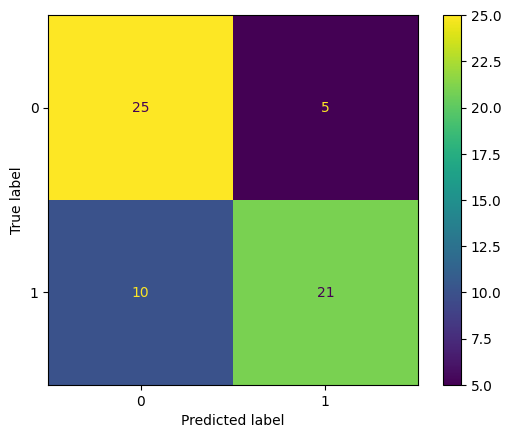

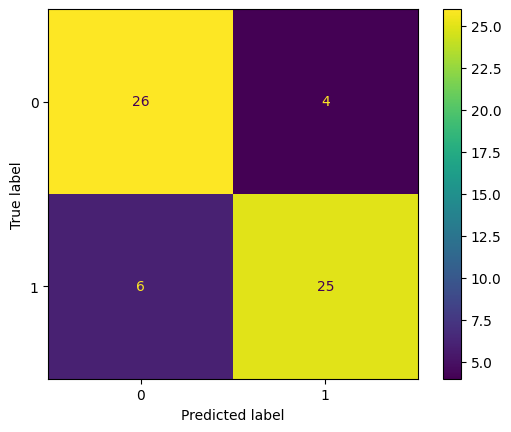

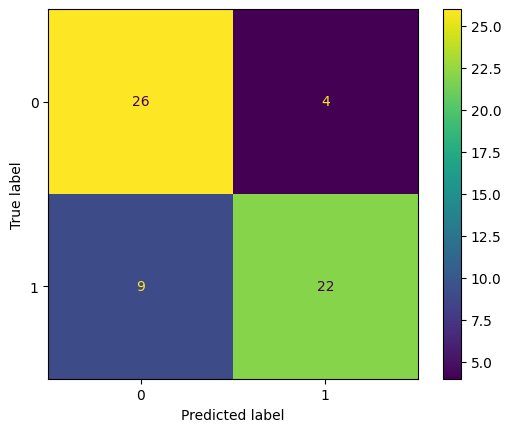

In [28]:
matrix_knn = metrics.confusion_matrix(y_test, knn1_pred)

matrix_log = metrics.confusion_matrix(y_test, prediction)

matrix_svm = metrics.confusion_matrix(y_test, predict_svm)

print("KNN")
disp_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix_knn)
disp_knn.plot()

print("Logistic")
disp_log = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix_log)
disp_log.plot()

print("SVM")
disp_svm = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix_svm)
disp_svm.plot()

### Metrics

In [29]:
print('KNN Precision:', metrics.precision_score(y_test, knn1_pred))
print('KNN Recall:', metrics.recall_score(y_test, knn1_pred))
print('KNN Accuracy:', metrics.accuracy_score(y_test, knn1_pred))
print('KNN F1:', metrics.f1_score(y_test, knn1_pred))
print('')
print('LOG Precision:', metrics.precision_score(y_test, prediction))
print('LOG Recall:', metrics.recall_score(y_test, prediction))
print('LOG Accuracy:', metrics.accuracy_score(y_test, prediction))
print('LOG F1:', metrics.f1_score(y_test, prediction))
print('')
print('SVM Precision:', metrics.precision_score(y_test, predict_svm))
print('SVM Recall:', metrics.recall_score(y_test, predict_svm))
print('SVM Accuracy:', metrics.accuracy_score(y_test, predict_svm))
print('SVM F1:', metrics.f1_score(y_test, predict_svm))

KNN Precision: 0.8076923076923077
KNN Recall: 0.6774193548387096
KNN Accuracy: 0.7540983606557377
KNN F1: 0.7368421052631579

LOG Precision: 0.8620689655172413
LOG Recall: 0.8064516129032258
LOG Accuracy: 0.8360655737704918
LOG F1: 0.8333333333333334

SVM Precision: 0.8461538461538461
SVM Recall: 0.7096774193548387
SVM Accuracy: 0.7868852459016393
SVM F1: 0.7719298245614035


### P-value analysis

In [30]:
# Import the packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

# Initiate the SelectKBest model
kbest_fc = SelectKBest(score_func=f_classif, k=5)

# Fit the model to all data
kbest_new = kbest_fc.fit(X, y)

# Check the most significant features
print('(f_classif) Most significant features: ' + str(kbest_new.get_feature_names_out()))
sorted_pvalues = list(zip(X.columns, kbest_new.pvalues_))
sorted_pvalues.sort(key=lambda tup: tup[1])

# Print 20 most significant values
for column, pvalue in sorted_pvalues[:20]:
    print(f'{column}: {pvalue}')

(f_classif) Most significant features: ['Temperature (F)_min' 'Temperature (F)_avg' 'Temperature (F)_max'
 'Humidity (%)_min' 'Humidity (%)_avg']
Temperature (F)_max: 3.534571252453644e-22
Temperature (F)_avg: 2.022333165555587e-19
Humidity (%)_min: 1.377447265595099e-16
Humidity (%)_avg: 4.278299017511215e-15
Temperature (F)_min: 1.5785303903883146e-11
Humidity (%)_max: 7.985549081210641e-07
Locations_Affected_CA: 1.366717213722277e-05
Condition__Fair: 2.0042056317093447e-05
Season_Started_Summer: 5.152741105581222e-05
Season_Started_Winter: 0.0002458184579612514
Dewpoint (F)_max: 0.0002871661878636925
Condition__Cloudy: 0.0003126861462529414
Type_Of_Location_Arctic: 0.0005531254069897448
Locations_Affected_ON: 0.0008640711504199636
Dewpoint (F)_avg: 0.001703512407733391
Type_Of_Location_Flat: 0.0034757913453155077
Locations_Affected_CO: 0.004703797613177441
Locations_Affected_NT: 0.00476712353220026
Condition__Light Rain: 0.012941899749140024
Condition__Mist: 0.019229408747062412


### ROC

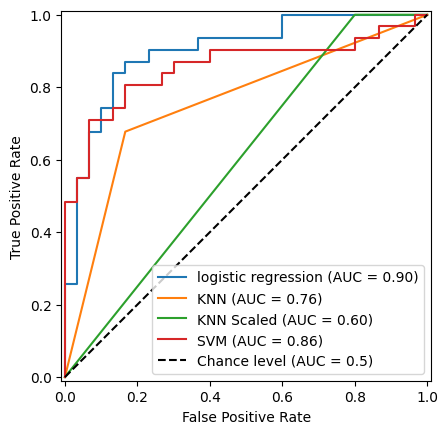

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities) 
roc_auc = metrics.auc(fpr, tpr)
display1 = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, 
estimator_name='logistic regression')
plt1 = display1.plot()

pp = knn.predict_proba(X_test)
fpr_pp, tpr_knn, thresholds = metrics.roc_curve(y_test, pp[:, 1]) 
roc_auc_pp = metrics.auc(fpr_pp, tpr_knn)
display = metrics.RocCurveDisplay(fpr=fpr_pp, tpr=tpr_knn, roc_auc=roc_auc_pp, 
estimator_name='KNN')
plt2 = display.plot(ax=plt1.ax_)

pp_scaled = knn_scaled.predict_proba(X_test)
fpr_pp_scaled, tpr_knn_scaled, thresholds = metrics.roc_curve(y_test, pp_scaled[:, 1]) 
roc_auc_pp_scaled = metrics.auc(fpr_pp_scaled, tpr_knn_scaled)
display_scaled = metrics.RocCurveDisplay(fpr=fpr_pp_scaled, tpr=tpr_knn_scaled, roc_auc=roc_auc_pp_scaled, 
estimator_name='KNN Scaled')
plt2_scaled = display_scaled.plot(ax=plt2.ax_)

probabilities_svm = model_svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities_svm) 
roc_auc = metrics.auc(fpr, tpr)
display2 = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, 
estimator_name='SVM')
display2.plot(ax=plt2_scaled.ax_, plot_chance_level=True)

We used confusion matrices to compare the results from our KNN, SVM, and Logistic regression models.  Our confusion matrices show that logistic regression has the best metrics with 86% precision, 80% recall, 84% accuracy, and an 83% F1 score. Our KNN model has the lowest of these metrics with 81% precision, 68% recall, 75% accuracy, and a 74% F1 score. Our SVM model, while still producing good metrics, performed slightly better than the KNN model but not as good as the Logistic Regression model. Our SVM model had a precision of 79%, 71% recall, 75% accuracy, and a 75% F1 score. Of our 3 models, logistic regression proved to be the best fit.  

The results from our Confusion matrices directly translate to the ROC curves that we have here. We begin with our KNN model has the least steep ROC curve which means that this model does not achieve a high TP rate while keeping a low FP rate. Our KNN model has the lowest of precision, recall, accuracy and F1. These results allow us to safely conclude that the KNN model is not the best model for our purposes.
Doing slightly better, we have the Support Vector Machine model. The TP and FP rates of the SVM and Logistic regression are similar and quite steep in the beginning, but SVM has slight less steepness in comparison to Logistic regression in the long run. Similar to the precision, recall, accuracy and F1 scores mentioned above, we can see that the SVM model is our middle-ground and performs well, but has precision in between the KNN model and the logistic regression model.

Lastly, we have our best model, the Logistic Regression model. We want a model where the TP rate is as large as possible compared to the FP rate, and this is achieved by our logistic regression model.The ideal model is represented by the point on the curve that is as far as possible from a straight line at  y=x. This is because  y=x represents a model that always makes an equal number of correct and wrong classifications, no matter what the threshold value is. This is exhibited by our Logistic Regression model, and supported by its stats from the confusion matrices, which makes it the clear best choice for our model.


Logistic regression’s success may stem from the linear relationship between the predictor variables, and the outcome’s log odds. . In contrast, since KNN and SVM don’t make assumptions about the underlying data distribution, they aren’t optimal if we have relationships that are nonlinear. 

Another reason that logistic regression is preferred, is because it assumes observations are independent.  Since our dataset meets this assumption, , logistic regression can provide reliable estimates. KNN, on the other hand, relies on the similarity of observations and may perform suboptimally if the assumption of independence is violated. SVM can handle some degree of dependence among observations but may still be affected if the data exhibit strong dependencies.

Logistic regression makes it easy to interpret results by estimating the probability of the outcome, given the predictors. Due to its ease of interpretation, logistic regression is a preferred choice, since it’s important for us to understand the factors driving wildfire formation. . 


We’ll use p-values, and examine the values generated by our notebook: 

The 6 most significant factors directly relate to temperature and humidity. This intuitively makes sense, since hotter and drier conditions often result in more flammability, due to added “fuel” in the fire triangle. Colder conditions make it harder for wildfires to sustain themselves, due to the absence of “heat” in the fire triangle.

Next, location is a significant factor. Notably, whether the location of origin is in California or Ontario. We can likely attribute this to our dataset - most data points in California correspond to real wildfires, whereas most Ontario points correspond to non-fires. A majority of significant historical wildfires originate in California. Ontario likely had more selection bias during the stage of randomly picking non-fire points. 

Season is roughly equal to location when looking at wildfire significance. Our model believes that wildfires are most likely to occur when it’s “not winter”, instead of specifically “being summer.”

The remaining significant factors are still small in p-value, but are still orders of magnitude larger than our previously mentioned points. The remaining significant factors are: 

Location being Colorado

Location being Northwest Territories

Season being Summer

Location being Florida

And finally Windspeed
